In [17]:
import os
import pandas as pd

names_df = pd.DataFrame(os.listdir("./data/pokemon_images/images"), columns=["Name"])
names_df["Path"] = "./data/pokemon_images/images/" + names_df["Name"]
names_df["Name"] = names_df["Name"].str.split(".").str[0]
display(names_df)

health_stats = pd.read_csv("./data/pokemon_with_stats/Pokemon.csv")
health_stats["Name"] = health_stats["Name"].str.lower()
health_stats = health_stats.drop(
    ["#", "Type 1", "Type 2", "Total", "Generation", "Legendary"], axis=1
)
display(health_stats)

merged = names_df.merge(health_stats, on=["Name"], how="inner")

merged

,Name,Path
0,parasect,./data/pokemon_images/images/parasect.png
1,lumineon,./data/pokemon_images/images/lumineon.png
2,raikou,./data/pokemon_images/images/raikou.png
3,dedenne,./data/pokemon_images/images/dedenne.png
4,pyroar,./data/pokemon_images/images/pyroar.png
...,...,...
804,floatzel,./data/pokemon_images/images/floatzel.png
805,latios,./data/pokemon_images/images/latios.png
806,mew,./data/pokemon_images/images/mew.png
807,ekans,./data/pokemon_images/images/ekans.png


,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,bulbasaur,45,49,49,65,65,45
1,ivysaur,60,62,63,80,80,60
2,venusaur,80,82,83,100,100,80
3,venusaurmega venusaur,80,100,123,122,120,80
4,charmander,39,52,43,60,50,65
...,...,...,...,...,...,...,...
795,diancie,50,100,150,100,150,50
796,dianciemega diancie,50,160,110,160,110,110
797,hoopahoopa confined,80,110,60,150,130,70
798,hoopahoopa unbound,80,160,60,170,130,80


,Name,Path,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,parasect,./data/pokemon_images/images/parasect.png,60,95,80,60,80,30
1,lumineon,./data/pokemon_images/images/lumineon.png,69,69,76,69,86,91
2,raikou,./data/pokemon_images/images/raikou.png,90,85,75,115,100,115
3,dedenne,./data/pokemon_images/images/dedenne.png,67,58,57,81,67,101
4,pyroar,./data/pokemon_images/images/pyroar.png,86,68,72,109,66,106
...,...,...,...,...,...,...,...,...
693,slowpoke,./data/pokemon_images/images/slowpoke.png,90,65,65,40,40,15
694,floatzel,./data/pokemon_images/images/floatzel.png,85,105,55,85,50,115
695,latios,./data/pokemon_images/images/latios.png,80,90,80,130,110,110
696,mew,./data/pokemon_images/images/mew.png,100,100,100,100,100,100


In [33]:
import numpy as np
import cv2

npz_paths = []
for i, row in merged.iterrows():
    picture_path = row["Path"]

    npz_path = picture_path.replace(".png", ".npz")
    npz_paths.append(npz_path)

    pic_bgr_arr = cv2.imread(picture_path)
    pic_rgb_arr = cv2.cvtColor(pic_bgr_arr, cv2.COLOR_BGR2RGB)

    atk, deff = row["Attack"], row["Defense"]
    spatk, spdef, spd = row["Sp. Atk"], row["Sp. Def"], row["Speed"]
    stats = np.array([atk, deff, spatk, spdef, spd])

    hp = row["HP"]
    np.savez_compressed(npz_path, pic=pic_rgb_arr, stats=stats, hp=hp)

merged["NPZ_Path"] = pd.Series(npz_paths)

stats_df = merged.select_dtypes("number").drop("HP", axis=1)

means = stats_df.mean().values
std_devs = stats_df.std().values

In [34]:
import tensorflow as tf


def stat_scaler(tensor):
    return (tensor - means) / std_devs


stat_scaler(tf.constant([2, 3, 4, 5, 6]))

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([-2.57142857, -2.31034483, -2.28571429, -2.42307692, -2.18518519])>

In [46]:
merged

,Name,Path,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,NPZ_Path
0,parasect,./data/pokemon_images/images/parasect.png,60,95,80,60,80,30,./data/pokemon_images/images/parasect.npz
1,lumineon,./data/pokemon_images/images/lumineon.png,69,69,76,69,86,91,./data/pokemon_images/images/lumineon.npz
2,raikou,./data/pokemon_images/images/raikou.png,90,85,75,115,100,115,./data/pokemon_images/images/raikou.npz
3,dedenne,./data/pokemon_images/images/dedenne.png,67,58,57,81,67,101,./data/pokemon_images/images/dedenne.npz
4,pyroar,./data/pokemon_images/images/pyroar.png,86,68,72,109,66,106,./data/pokemon_images/images/pyroar.npz
...,...,...,...,...,...,...,...,...,...
693,slowpoke,./data/pokemon_images/images/slowpoke.png,90,65,65,40,40,15,./data/pokemon_images/images/slowpoke.npz
694,floatzel,./data/pokemon_images/images/floatzel.png,85,105,55,85,50,115,./data/pokemon_images/images/floatzel.npz
695,latios,./data/pokemon_images/images/latios.png,80,90,80,130,110,110,./data/pokemon_images/images/latios.npz
696,mew,./data/pokemon_images/images/mew.png,100,100,100,100,100,100,./data/pokemon_images/images/mew.npz


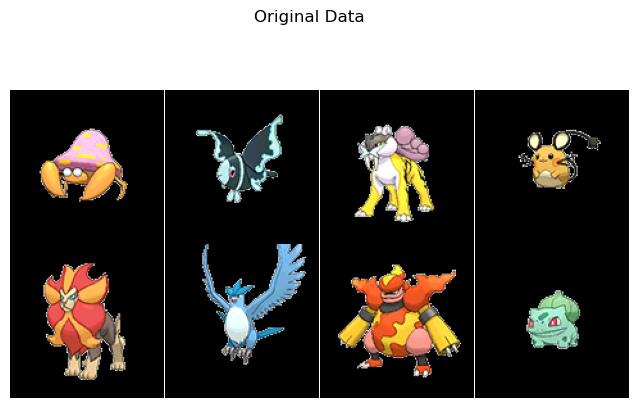

In [51]:
import matplotlib.pyplot as plt

abomasnow_npz = np.load("./data/pokemon_images/images/abomasnow.npz")
abra_npz = np.load("./data/pokemon_images/images/abra.npz")

plt.figure(figsize=(8, 8))
for idx, npz_path in enumerate(merged["NPZ_Path"].values[:8]):
    pkmon_npz = np.load(npz_path)
    plt.subplot(4, 4, idx + 1)
    plt.imshow(pkmon_npz["pic"])
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.suptitle("Original Data")
plt.show()

In [58]:
# we can drop all data in the df that exists in the npz
drop_cols = ["Path", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
merged_clean = merged.drop(drop_cols, axis=1)
shuffled_df = merged_clean.sample(frac=1)

train_idx, val_idx = 500, 600
train_df, val_df, test_df = (
    shuffled_df.iloc[:train_idx],
    shuffled_df.iloc[train_idx:val_idx],
    shuffled_df.iloc[val_idx:],
)

In [57]:
shuffled_df = merged_clean.sample(frac=1)
shuffled_df

,Name,HP,NPZ_Path
130,sunflora,75,./data/pokemon_images/images/sunflora.npz
426,lunatone,70,./data/pokemon_images/images/lunatone.npz
253,trapinch,45,./data/pokemon_images/images/trapinch.npz
522,jigglypuff,115,./data/pokemon_images/images/jigglypuff.npz
221,munchlax,135,./data/pokemon_images/images/munchlax.npz
...,...,...,...
624,yamask,38,./data/pokemon_images/images/yamask.npz
590,krabby,30,./data/pokemon_images/images/krabby.npz
535,buizel,55,./data/pokemon_images/images/buizel.npz
180,tauros,75,./data/pokemon_images/images/tauros.npz
